In [28]:
#!pip install pmdarima

In [29]:
# Kütüphaneleri import edelim;
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [30]:
# Verimizi okuyup yazdıralım;
df = pd.read_csv("monthly-car-sales.csv", parse_dates=["Month"], index_col='Month').asfreq('MS')
df

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 1960-01-01 to 1968-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   108 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


<Axes: xlabel='Month'>

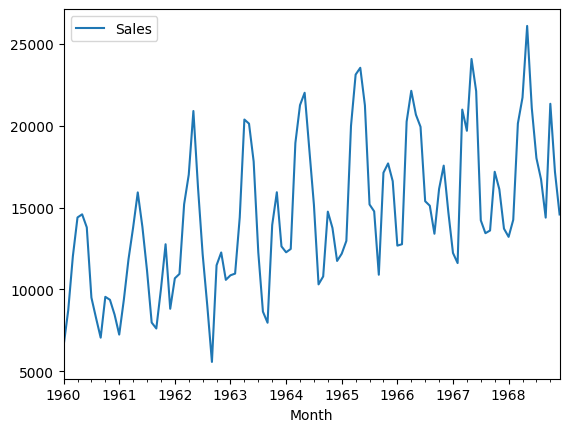

In [32]:
df.plot()

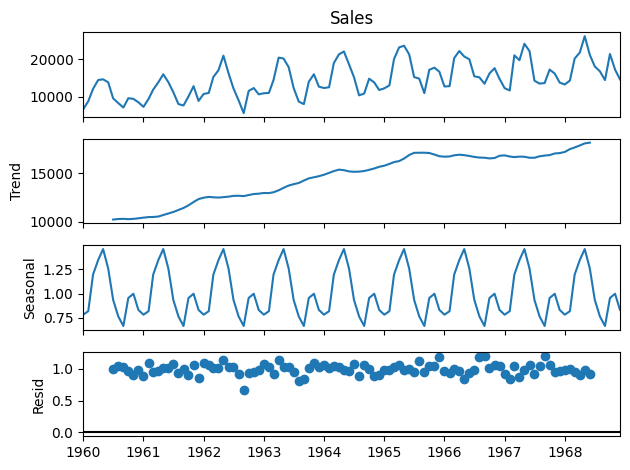

In [33]:
# Veriyi bileşenlerine ayıralım, modelimizin 'mul' mode olduğunu görüyoruz(residul);
dec_df = seasonal_decompose(df['Sales'], model="mul", period=12)
fig = dec_df.plot()

In [34]:
# adfuller testi sonuçlarına göre p-value 0.05'ten büyük olduğu için serimizin durağan olmadığını söyleyebiliriz;
adf_test = adfuller(df["Sales"])
print(adf_test)
p_value = adf_test[1]
print(p_value)

(-1.2238127661752858, 0.6632691049832861, 12, 95, {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}, 1671.1995896872572)
0.6632691049832861


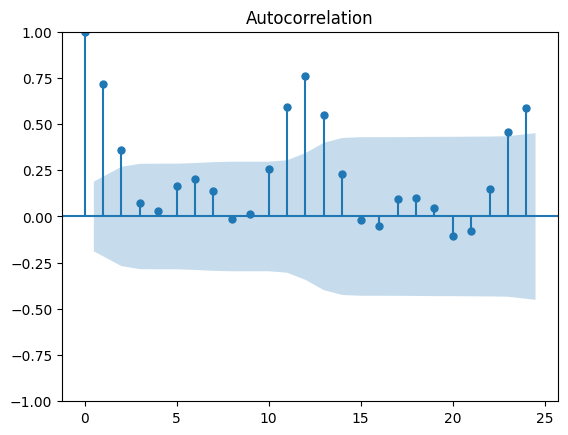

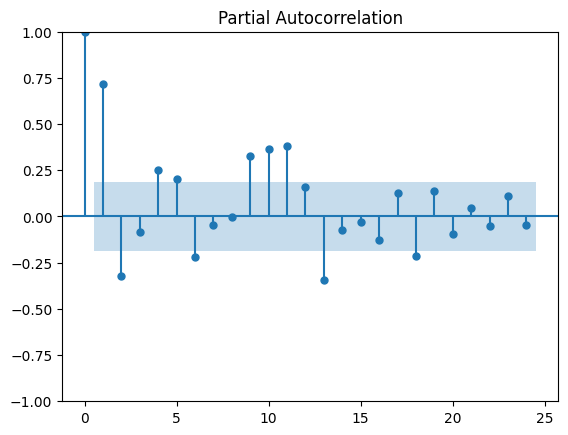

In [35]:
# veriyi durağanlaştırmadan önce acf ve pacf görsellerine bakaılım; Modelimizin acf ve pacf grafiklerine baktığımızda ARMA modeline daha uygun olduğunu göz kararı söyleyebiliriz;
fig = plot_acf(df['Sales'], lags=24)
fig = plot_pacf(df['Sales'], lags=24)

In [36]:
df

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


In [37]:
df_log = np.log(df/df.shift()).dropna()
adf_test = adfuller(df_log["Sales"])
p_value = adf_test[1]
print(p_value)

0.0006749140289814


In [38]:
df_log

,Sales
Month,
1960-02-01,0.287071
1960-03-01,0.320535
1960-04-01,0.179810
1960-05-01,0.013250
1960-06-01,-0.056115
...,...
1968-08-01,-0.074979
1968-09-01,-0.150539
1968-10-01,0.394491


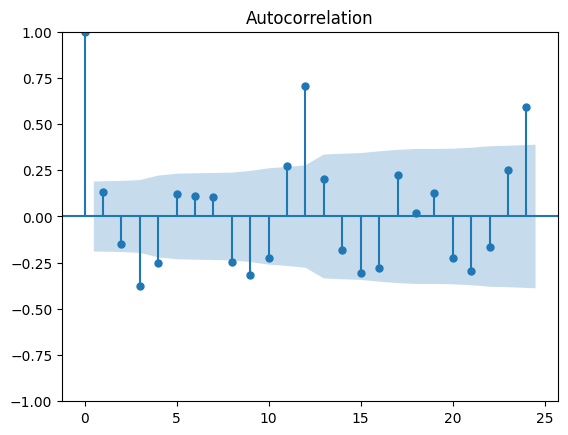

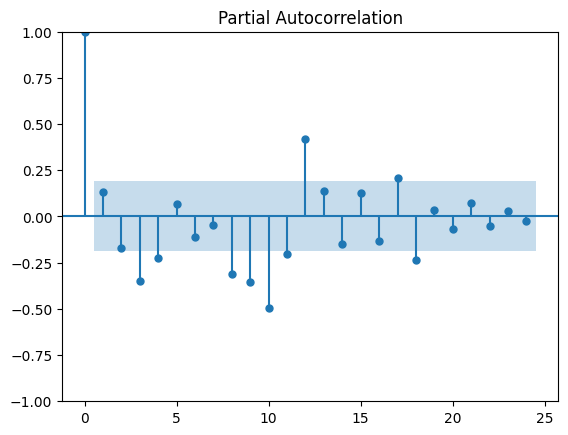

In [39]:
# veriyi durağanlaştırmadan önce acf ve pacf görsellerine bakaılım; Modelimizin acf ve pacf grafiklerine baktığımızda ARMA modeline daha uygun olduğunu göz kararı söyleyebiliriz;
fig = plot_acf(df_log['Sales'], lags=24)
fig = plot_pacf(df_log['Sales'], lags=24)

In [40]:
train, test = df_log.iloc[:-11], df_log.iloc[-11:]
print(train)
print(test)

               Sales
Month               
1960-02-01  0.287071
1960-03-01  0.320535
1960-04-01  0.179810
1960-05-01  0.013250
1960-06-01 -0.056115
...              ...
1967-09-01  0.012134
1967-10-01  0.234231
1967-11-01 -0.064155
1967-12-01 -0.161654
1968-01-01 -0.037370

[96 rows x 1 columns]
               Sales
Month               
1968-02-01  0.075853
1968-03-01  0.345831
1968-04-01  0.075805
1968-05-01  0.183433
1968-06-01 -0.213383
1968-07-01 -0.156810
1968-08-01 -0.074979
1968-09-01 -0.150539
1968-10-01  0.394491
1968-11-01 -0.216931
1968-12-01 -0.164301


In [41]:
# # Bir üst satırda logaritmaları aldığımız için d'leri (difference) 0 bırakdık, tekrardan fark almasın diye;
# model = pm.auto_arima(train["Sales"],
#                       seasonal=True, m=12,
#                       d=0, D=0,
#                  	  max_p=8, max_q=8,
#                     max_P=8, max_Q=8,
#                       trace=True,
#                       error_action='ignore',
#                       suppress_warnings=True)

# # Print model summary
# print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-86.049, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3.374, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-92.064, Time=0.41 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-38.738, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1.462, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3.273, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-96.869, Time=0.67 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-38.765, Time=0.19 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=-96.616, Time=1.42 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=-97.531, Time=1.41 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=-48.249, Time=0.53 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(1,0,0)(1,0,3)[12] intercept   : AIC=-95.714, Time=5.67 sec
 ARIMA(1,0,0)(0,0,3)[12] intercept   : AIC=inf,

In [42]:
# AIC ve BIC değerlerini en iyi ... aldığımız için, bu parametreler ile modeli oluşturuyoruz;
best_model = SARIMAX(train["Sales"], order=(1,0,1), seasonal_order=(1,0,1,12), trend='n').fit()
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  60.744
Date:                            Fri, 12 Jan 2024   AIC                           -111.489
Time:                                    11:41:58   BIC                            -98.667
Sample:                                02-01-1960   HQIC                          -106.306
                                     - 01-01-1968                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2873      0.113      2.538      0.011       0.065       0.509
ma.L1         -0.9162      0.050   

<Axes: xlabel='Month'>

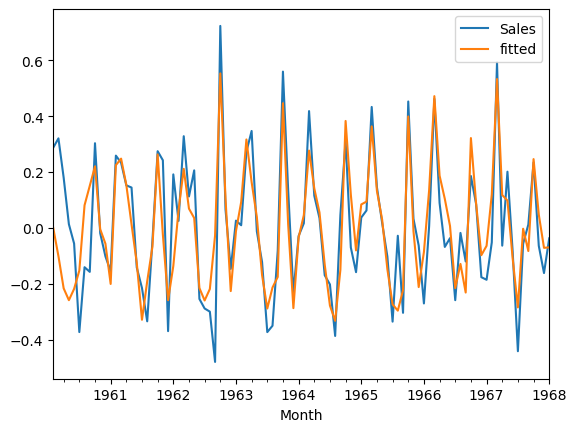

In [43]:
fitted = best_model.predict()
resids = best_model.resid
new_df = train.copy()
new_df["fitted"] = fitted
new_df.plot()

<Axes: xlabel='Month'>

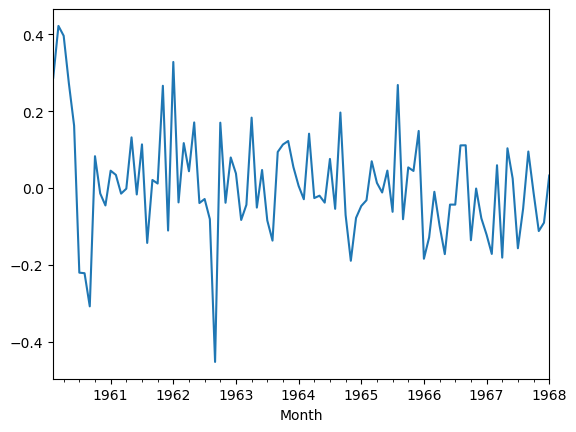

In [44]:
resids.plot()

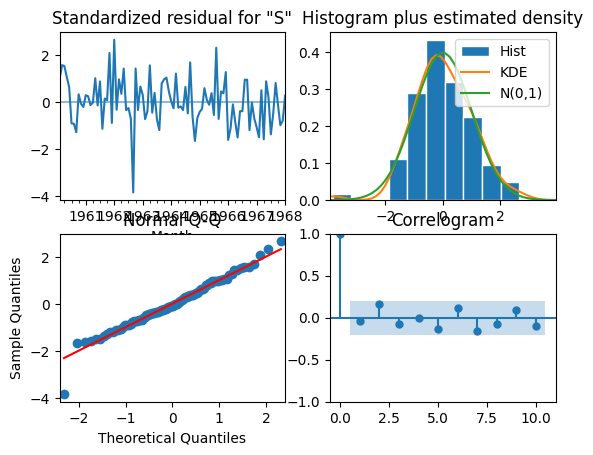

In [45]:
diags = best_model.plot_diagnostics()

In [46]:
mae = np.mean(np.abs(resids.values))
mse = np.mean(np.square(resids.values))
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

0.1053147034929683
0.019852494837455072
0.1408988816046993


In [47]:
test_predicted = best_model.forecast(steps=len(test))
test_predicted

1968-02-01   -0.009203
1968-03-01    0.476507
1968-04-01    0.027462
1968-05-01    0.086896
1968-06-01   -0.078492
1968-07-01   -0.336682
1968-08-01   -0.073486
1968-09-01   -0.064764
1968-10-01    0.252933
1968-11-01   -0.004371
1968-12-01   -0.145614
Freq: MS, Name: predicted_mean, dtype: float64

In [48]:
mae = np.mean(np.abs(test['Sales']-test_predicted))
mse = np.mean(np.square(test['Sales']-test_predicted))
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

0.1032225846572958
0.014495083473027246
0.12039552929003322


<ipython-input-49-5f8fef13b01a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["fitted"] = test_predicted


<Axes: xlabel='Month'>

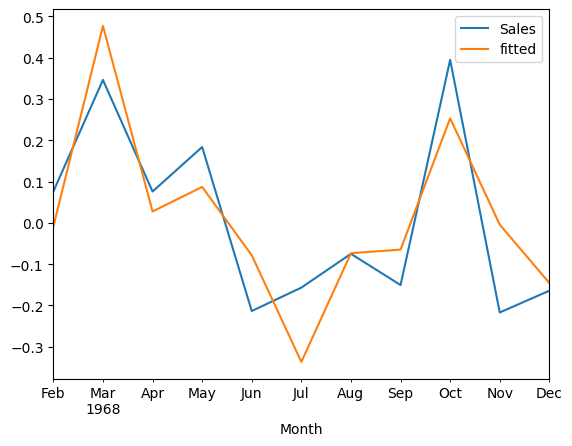

In [49]:
test["fitted"] = test_predicted
test.plot()

In [50]:
new_df.drop('fitted', axis=1, inplace=True)
new_df

,Sales
Month,
1960-02-01,0.287071
1960-03-01,0.320535
1960-04-01,0.179810
1960-05-01,0.013250
1960-06-01,-0.056115
...,...
1967-09-01,0.012134
1967-10-01,0.234231
1967-11-01,-0.064155


In [51]:
test_predicted = pd.DataFrame(test_predicted)
test_predicted

,predicted_mean
1968-02-01,-0.009203
1968-03-01,0.476507
1968-04-01,0.027462
1968-05-01,0.086896
1968-06-01,-0.078492
1968-07-01,-0.336682
1968-08-01,-0.073486
1968-09-01,-0.064764
1968-10-01,0.252933
1968-11-01,-0.004371


In [52]:
# İki DataFrame'i birleştir
merged_df = pd.concat([new_df, test_predicted], axis=0)

# NaN değerleri ele al
merged_df['Sales'] = merged_df['Sales'].fillna(merged_df['predicted_mean'])

# Gereksiz sütunu temizle
merged_df = merged_df.drop(columns=['predicted_mean'])
merged_df

,Sales
1960-02-01,0.287071
1960-03-01,0.320535
1960-04-01,0.179810
1960-05-01,0.013250
1960-06-01,-0.056115
...,...
1968-08-01,-0.073486
1968-09-01,-0.064764
1968-10-01,0.252933
1968-11-01,-0.004371


In [53]:
# df_log'dan orijinal verilere geri dönüş
df_original = round(np.exp(merged_df) * df.shift())

# NaN değerleri temizle
df_original = df_original.dropna()

# Orijinal verileri göster
df_original

,Sales
1960-02-01,8728.0
1960-03-01,12026.0
1960-04-01,14395.0
1960-05-01,14587.0
1960-06-01,13791.0
...,...
1968-08-01,16747.0
1968-09-01,15673.0
1968-10-01,18525.0
1968-11-01,21249.0


In [54]:
# veri setimizin ilk hali
df

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342
